In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [3]:
billets = pd.read_csv('billets.csv', sep=';')

In [4]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [6]:
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [7]:
billets["is_genuine"].replace([True, False], [1,0], inplace=True)

In [8]:
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [9]:
df_nan = billets[billets.isna().any(axis=1)]

In [10]:
df_nan.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,NaN,3.25,112.79
99,1,171.93,104.07,104.18,NaN,3.14,113.08
151,1,172.07,103.80,104.38,NaN,3.02,112.93
197,1,171.45,103.66,103.80,NaN,3.62,113.27
241,1,171.83,104.14,104.06,NaN,3.02,112.36


In [11]:
df_filtered = billets.dropna()

In [12]:
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [13]:
df_filtered.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [14]:
len(df_filtered)

1463

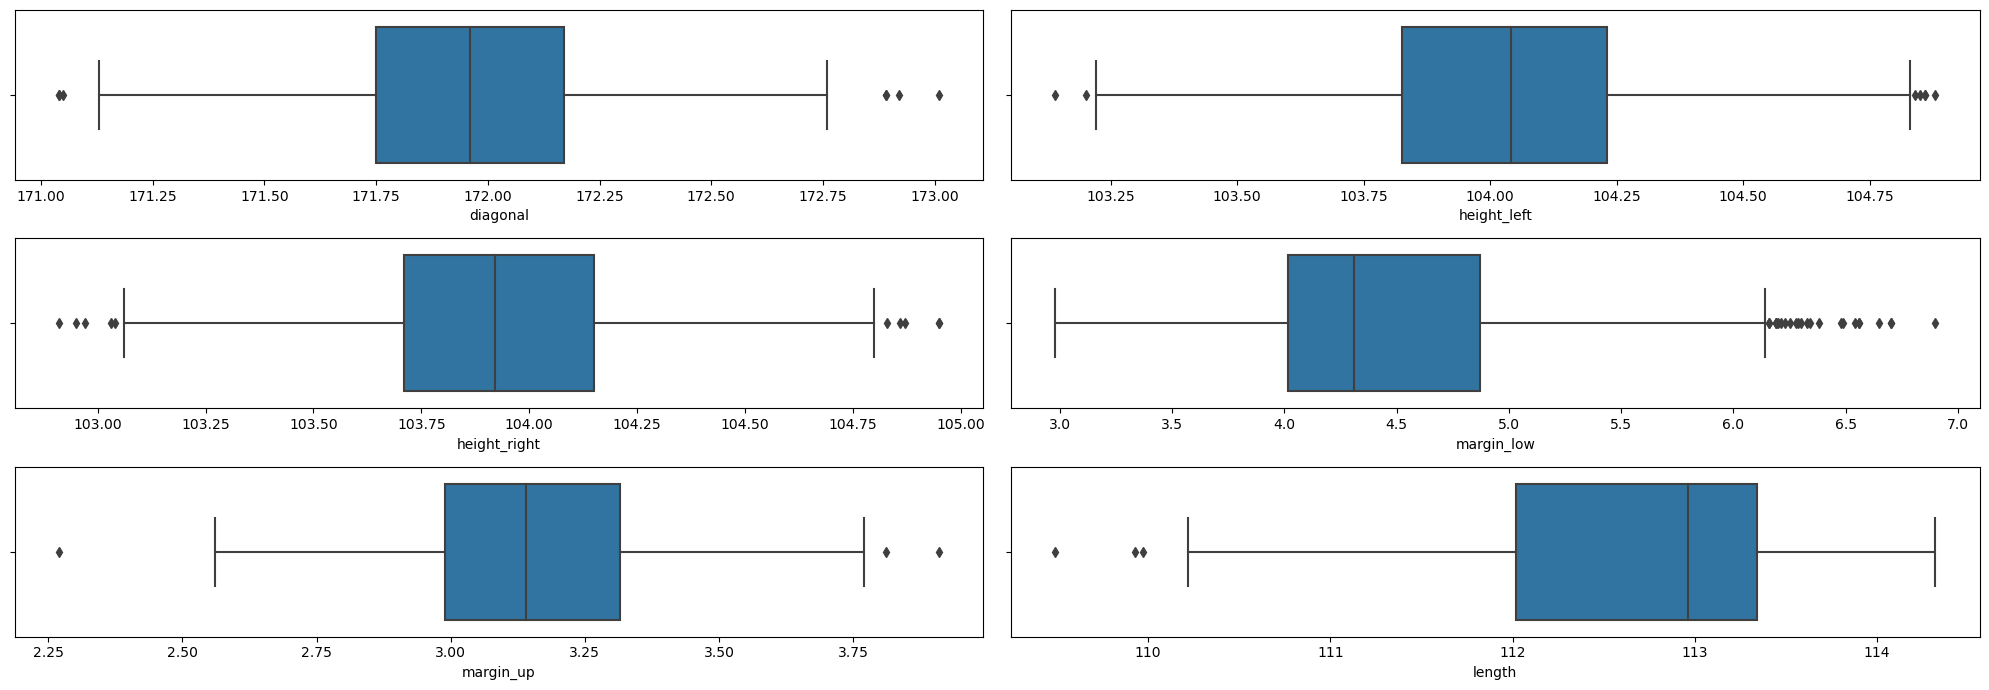

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(20,7))
df_value = df_filtered.drop('is_genuine', axis=1)
for index, column in enumerate(df_value.columns):
    i, j = divmod(index, 2)
    sns.boxplot(ax=ax[i, j], data=df_value, x=df_value[column])
        
plt.tight_layout()
plt.show()

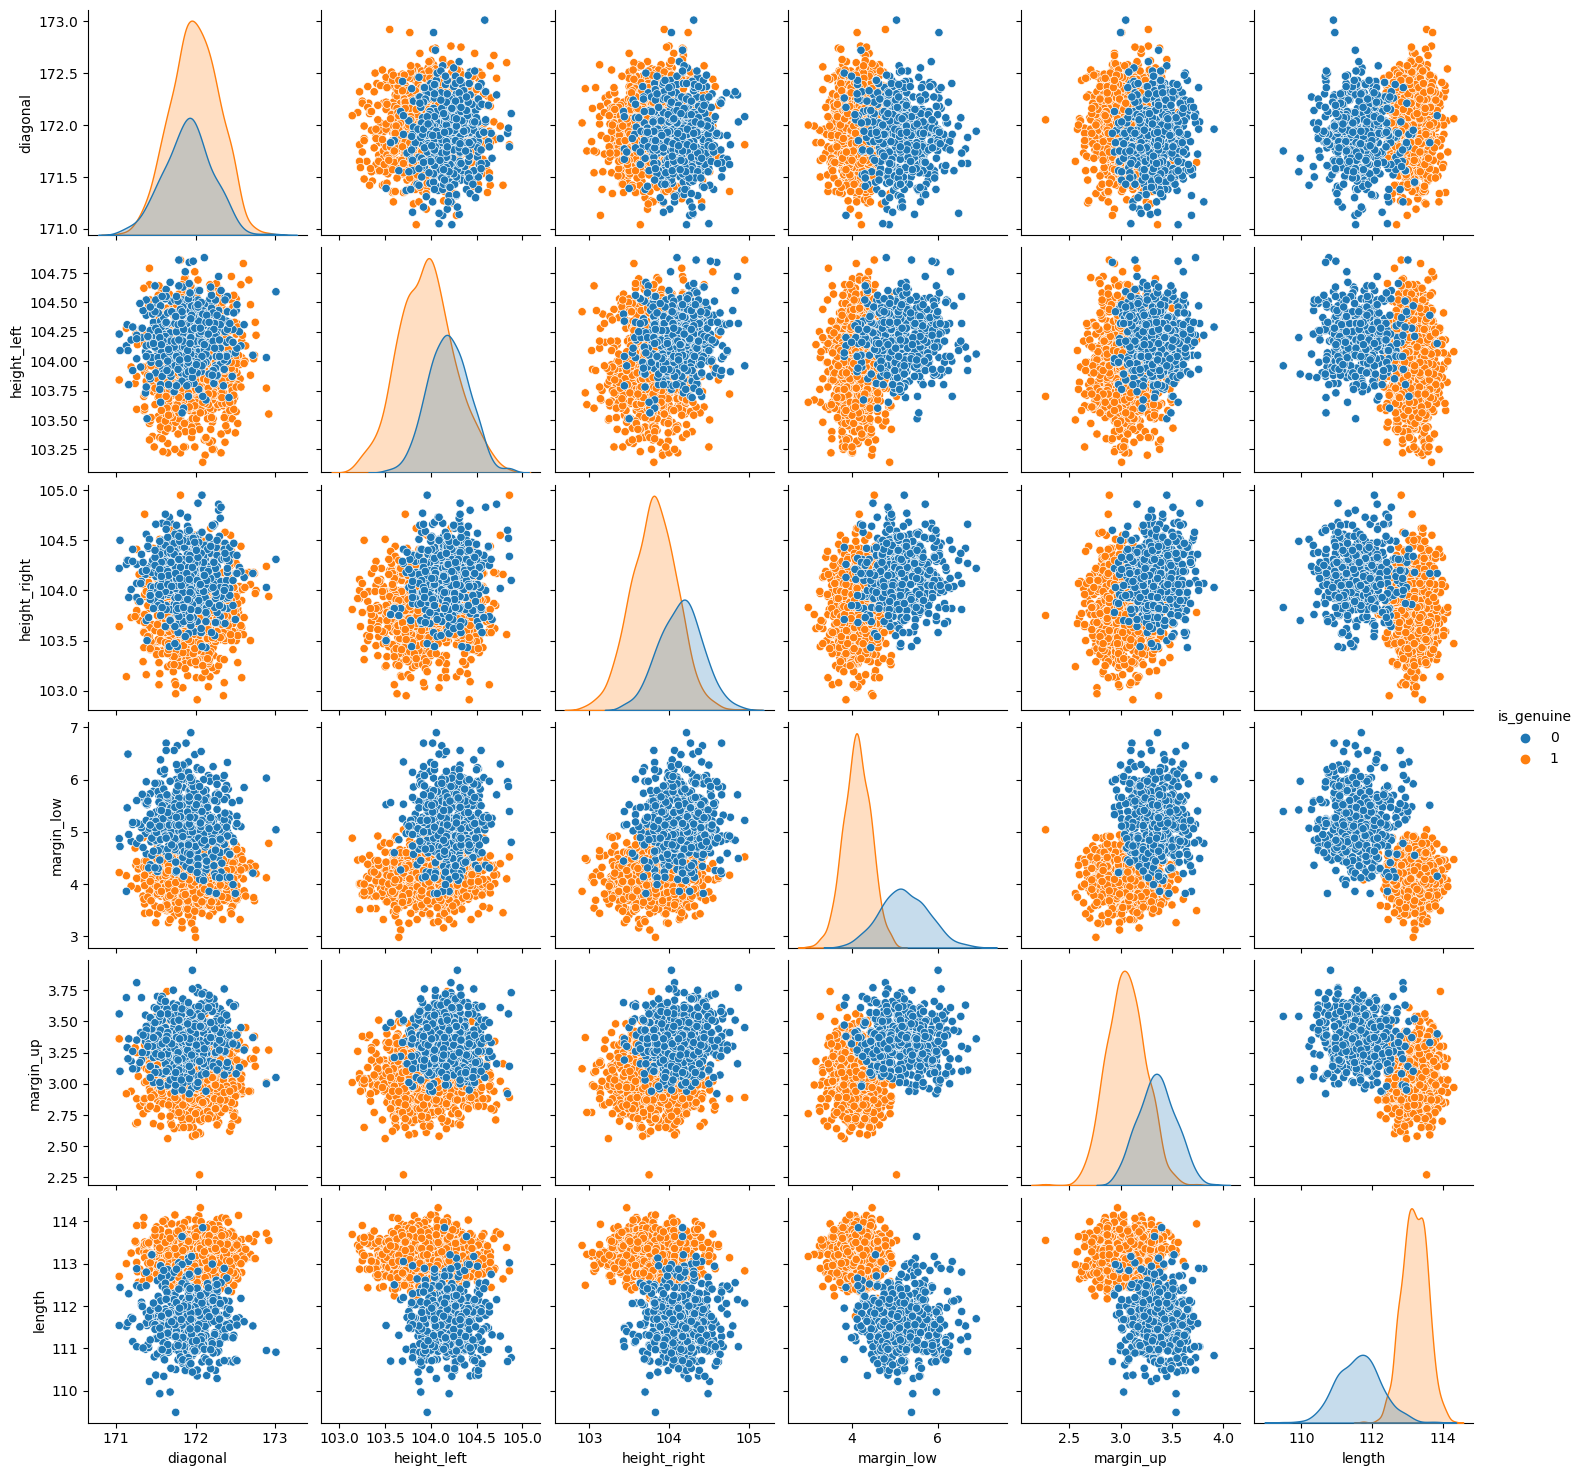

In [16]:
sns.pairplot(df_filtered, hue="is_genuine")

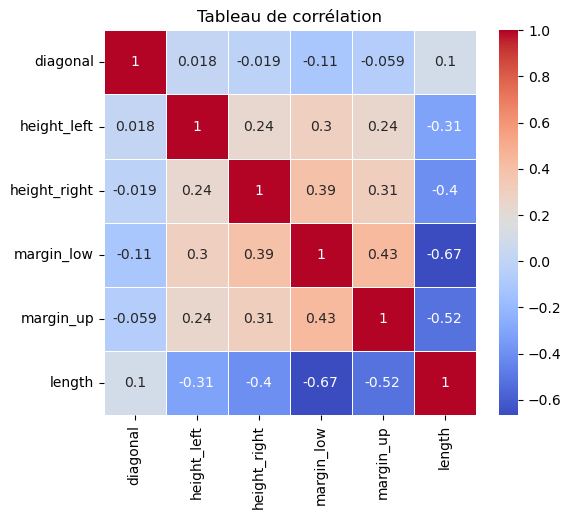

In [15]:
corr = df_value.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Tableau de corrélation")
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = df_filtered.columns.difference(['is_genuine'])
df_filtered_std = df_filtered.copy()
df_filtered_std[columns_to_scale] = scaler.fit_transform(df_filtered[columns_to_scale])

In [17]:
X = df_filtered_std[["diagonal", "height_left", "height_right", "margin_up", "length"]]
X = sm.add_constant(X)
y = df_filtered_std["margin_low"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          2.60e-202
Time:                        17:58:45   Log-Likelihood:                -1601.3
No. Observations:                1463   AIC:                             3215.
Df Residuals:                    1457   BIC:                             3246.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.724e-15      0.019  -1.44e-13   

Régression Linéaire

In [18]:
df_filtered.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_filtered[["diagonal", "height_left", "height_right", "margin_up", "length"]], df_filtered['margin_low'], test_size=0.2, random_state=42)

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

# Calculer et afficher RMSE et R²
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))

RMSE: 0.4375494823159243
R²: 0.5457956683532407


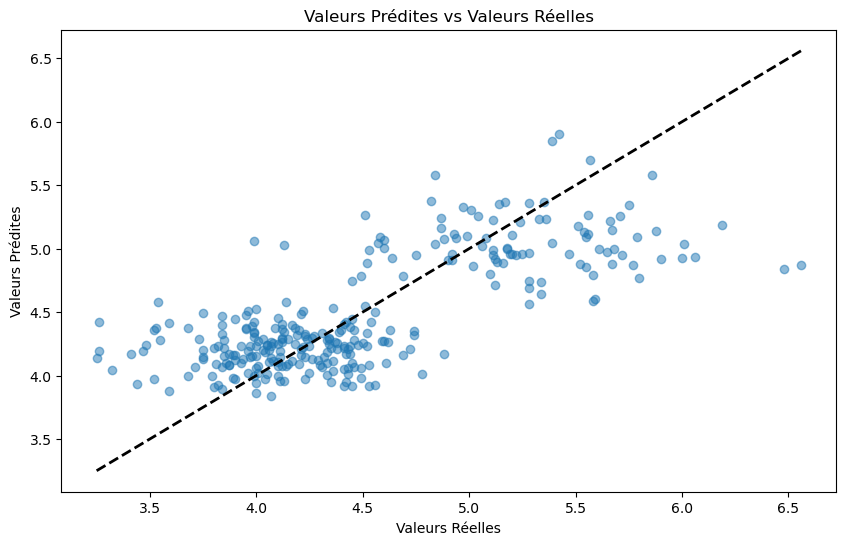

In [22]:
# Valeurs prédites vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Prédites vs Valeurs Réelles')
# Tracer la ligne y = x pour la référence
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

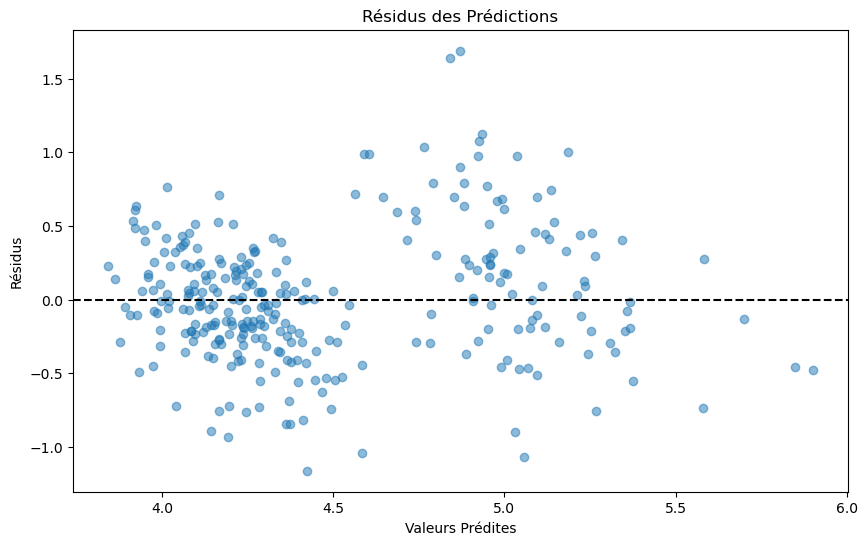

In [23]:
residus = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residus, alpha=0.5)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.title('Résidus des Prédictions')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

In [24]:
from scipy.stats import levene, bartlett
# Test de Levene
stat, p = levene(y_test, y_pred)
print('Test de Levene:\nStatistique = {:.2f}, p-value = {:.3f}'.format(stat, p))

Test de Levene:
Statistique = 25.20, p-value = 0.000


p-value < 0.05

Pas d'homoscédasticité

In [25]:
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residus)

print("Statistique de Durbin-Watson:", dw_stat)

Statistique de Durbin-Watson: 1.9376436012132763


proche de 2

Pas ou peu d'autocorrélation donc indépendance des erreurs

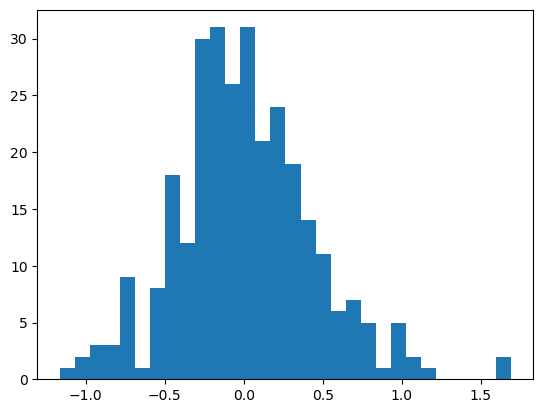

In [26]:
plt.hist(residus, bins=30)
plt.show()

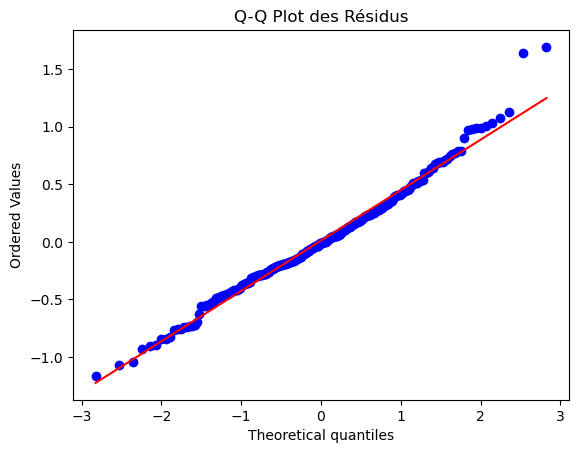

In [27]:
# Q-Q plot
stats.probplot(residus, dist="norm", plot=plt)
plt.title("Q-Q Plot des Résidus")
plt.show()

Test de Shapiro-Wilk

In [28]:
from scipy import stats
# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residus)
print(f"Statistique de Shapiro-Wilk: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

Statistique de Shapiro-Wilk: 0.9850907921791077, p-value: 0.003897853661328554


p-value < 0.05

les données ne suivent pas une distribution normale

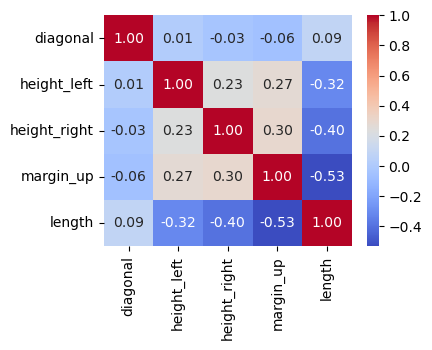

In [29]:
corr_matrix = X_train.corr()
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

corrélation modéré donc toléré

Conclusion hypothèses :

- Pas d'homoscédasticité mais d'hétéroscédasticité
- Pas de distribution normales des résidus
- Indépendance des résidus
- Pas de corrélation dérangeante 

In [30]:
X_nan = df_nan[["diagonal", "height_left", "height_right", "margin_up", "length"]]
X_nan_scaled = scaler.transform(X_nan)
y_nan_pred = model.predict(X_nan_scaled)

In [31]:
df_nan_fill = df_nan.copy()
df_nan_fill['margin_low'] = y_nan_pred
df_nan_fill.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1,171.94,103.89,103.45,4.323133,3.25,112.79
99,1,171.93,104.07,104.18,4.393907,3.14,113.08
151,1,172.07,103.80,104.38,4.416845,3.02,112.93
197,1,171.45,103.66,103.80,4.337374,3.62,113.27
241,1,171.83,104.14,104.06,4.634614,3.02,112.36


In [32]:
len(df_filtered)

1463

In [33]:
df_final = df_filtered.combine_first(df_nan_fill)
df_final.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [34]:
len(df_final)

1500

In [35]:
df_final.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [36]:
X_scaled = scaler.fit_transform(df_final[["diagonal", "height_left", "height_right", "margin_up", "length", "margin_low"]])
X_scaled = pd.DataFrame(X_scaled, columns=["diagonal", "height_left", "height_right", "margin_up", "length", "margin_low"])
X_scaled = sm.add_constant(X_scaled)
y = df_final["is_genuine"]

In [37]:
model = sm.OLS(y, X_scaled)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             is_genuine   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1316.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:58:52   Log-Likelihood:                 378.55
No. Observations:                1500   AIC:                            -743.1
Df Residuals:                    1493   BIC:                            -705.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6667      0.005    137.018   

ACP

In [38]:
X_scaled = X_scaled[["diagonal", "height_left", "height_right", "margin_up", "length", "margin_low"]]

In [39]:
component_number = 6
x_list = range(1, component_number+1)
names = X_scaled.index
columns_names = X_scaled.columns

In [40]:
from sklearn.decomposition import PCA
mypca = PCA(n_components=component_number)
mypca.fit(X_scaled)

PCA(n_components=6)

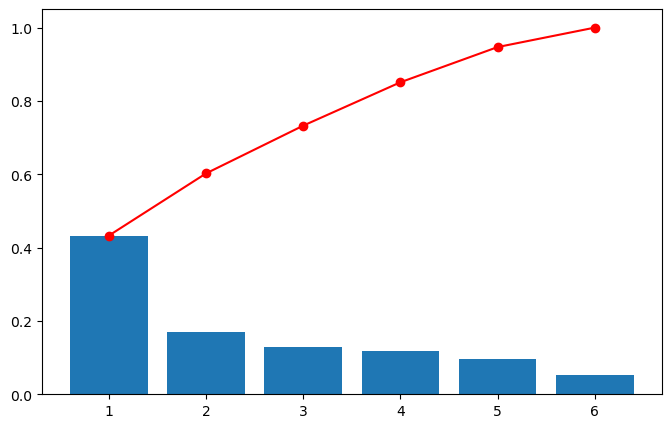

In [41]:
y = list(mypca.explained_variance_ratio_)

x = x_list

ycum = np.cumsum(y)

plt.figure(figsize=(8, 5))
plt.bar(x,y)

plt.plot(x,ycum,"-r", marker='o')

plt.show()

In [42]:
component_number = 5
mypca = PCA(n_components=component_number)
mypca.fit(X_scaled)
x_list = range(1, component_number+1)

In [43]:
pcs = mypca.components_
pcs = pd.DataFrame(pcs)
features = X_scaled.columns
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs

,diagonal,height_left,height_right,margin_up,length,margin_low
F1,-0.084636,0.330588,0.393558,0.439501,-0.527051,0.507658
F2,0.941317,0.307531,0.108268,-0.005095,0.048684,-0.072309
F3,-0.288049,0.885110,-0.162796,-0.269869,0.149064,-0.109807
F4,-0.101856,-0.049737,0.866823,-0.443476,0.176209,-0.089715
F5,-0.115529,0.101002,0.235592,0.712432,0.308632,-0.564035


<Axes: >

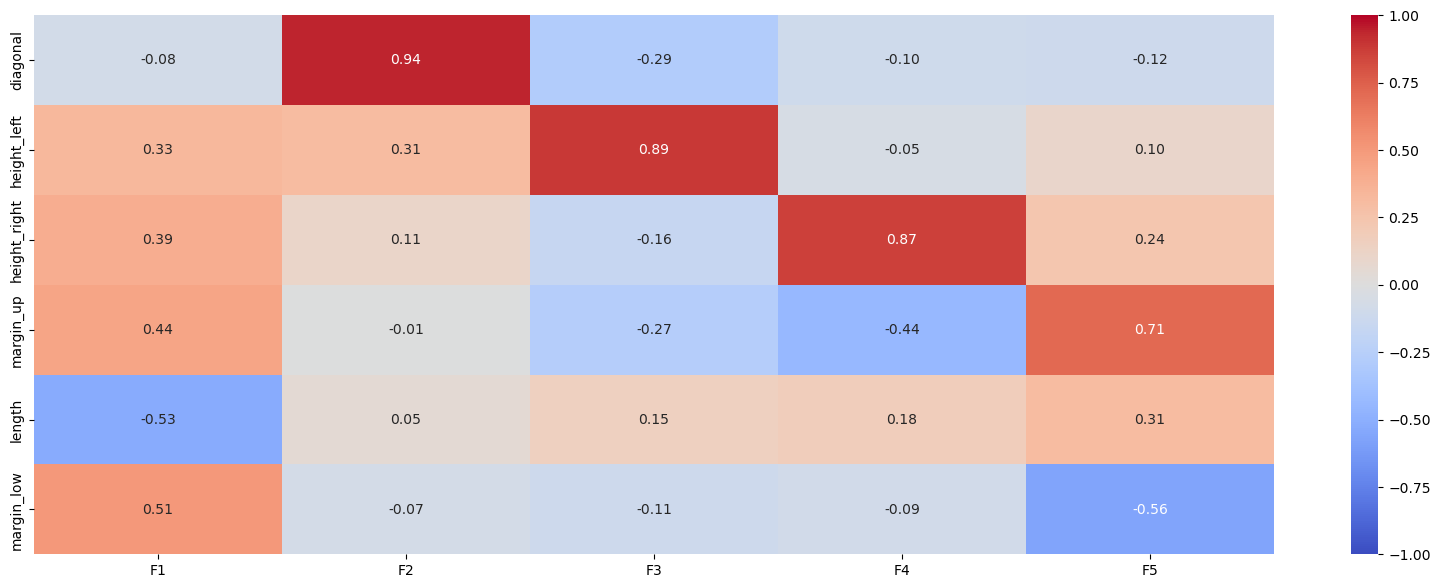

In [44]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [45]:
def circle_corr(x, y, mypca, features):
    fig, ax = plt.subplots(figsize=(8, 6))
    for i in range(0, mypca.components_.shape[1]):
        ax.arrow(0,
                0,  # Start the arrow at the origin
                mypca.components_[x, i],  #0 for PC1
                mypca.components_[y, i],  #1 for PC2
                head_width=0.07,
                head_length=0.07, 
                width=0.02,              )

        plt.text(mypca.components_[x, i] + 0.05,
                mypca.components_[y, i] + 0.05,
                features[i])
        
    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')


    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*mypca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*mypca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.show(block=False)

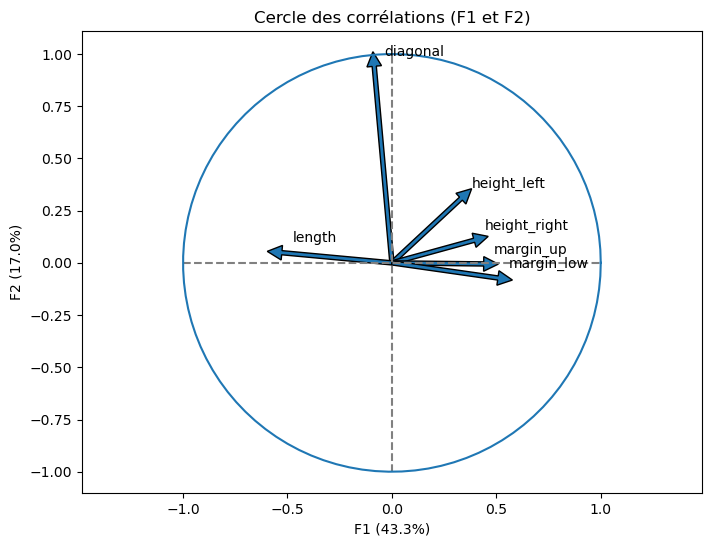

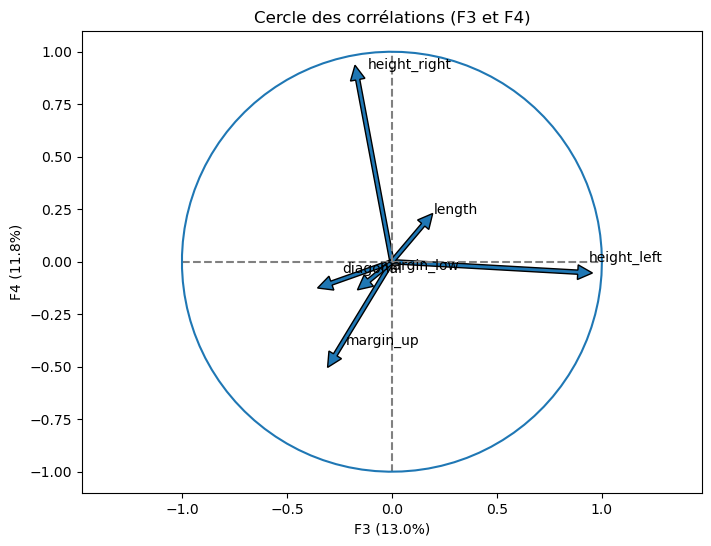

In [46]:
circle_corr(0, 1, mypca, features)
circle_corr(2, 3, mypca, features)

Régression Logistique

In [47]:
X = df_final[["diagonal", "height_left", "height_right", "margin_up", "length", "margin_low"]]
y = df_final['is_genuine']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

predictions_Lregression = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, predictions_Lregression))

Accuracy: 0.9933333333333333


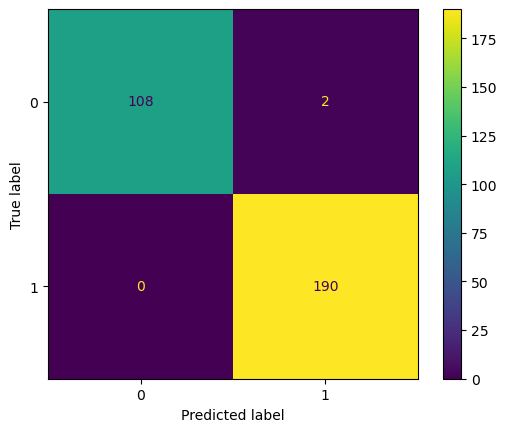

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_test, predictions_Lregression)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

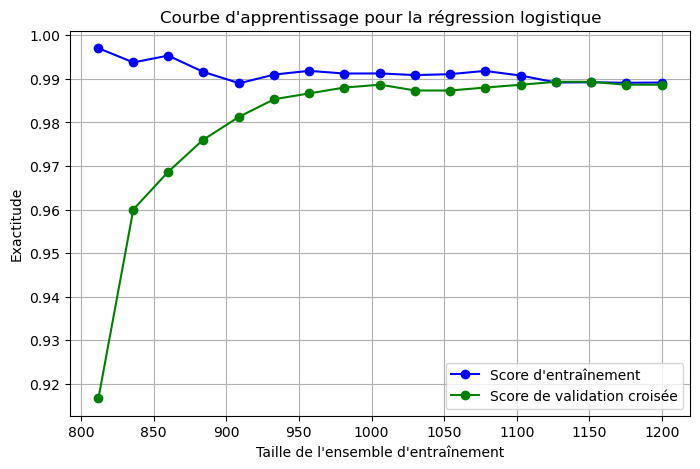

In [52]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = LogisticRegression(),
    X = X,
    y = y,
    train_sizes = np.linspace(0.01, 1.0, 50),  # 50 tailles d'ensemble d'entraînement proportionnelles
    cv = 5,  # Validation croisée avec 5 folds
    n_jobs = -1,  # Utiliser tous les processeurs disponibles
    scoring = 'accuracy'  # Évaluer les scores selon l'exactitude
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Score d\'entraînement', color='blue', marker='o')

plt.plot(train_sizes, validation_mean, label='Score de validation croisée', color='green', marker='o')

plt.title('Courbe d\'apprentissage pour la régression logistique')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Exactitude')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [53]:
X_test_proj = mypca.transform(X_test_scaled)

d:\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [54]:
def projection(x_y, cluster_colors):
    x, y = x_y
    plt.figure(figsize=(8, 6))
    
    plt.scatter(X_test_proj[:, x], X_test_proj[:, y], alpha=0.7, color=cluster_colors)

    #sns.color_palette("flare", as_cmap=True)
    plt.xlabel(f'F{x+1}')
    plt.ylabel(f'F{y+1}')
    plt.title(f'Plan factoriel F{x+1} et F{y+1} des clusters')
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


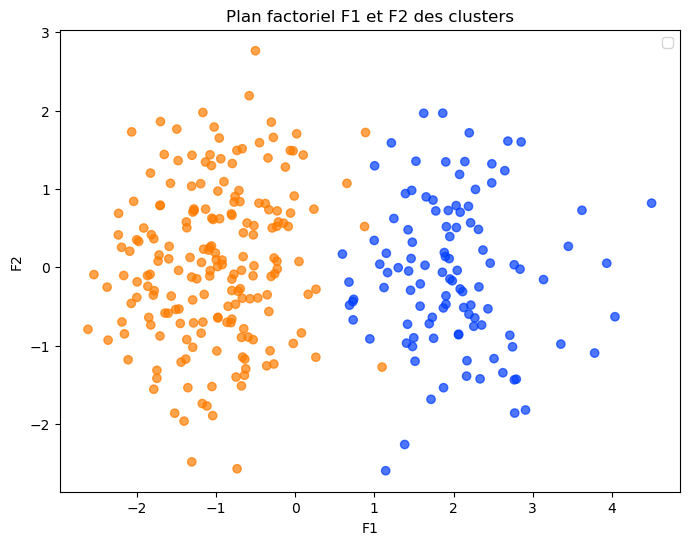

In [55]:
palette = sns.color_palette("bright", len(np.unique(predictions_Lregression)))
cluster_colors = [palette[label] for label in predictions_Lregression]
projection((0, 1), cluster_colors)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


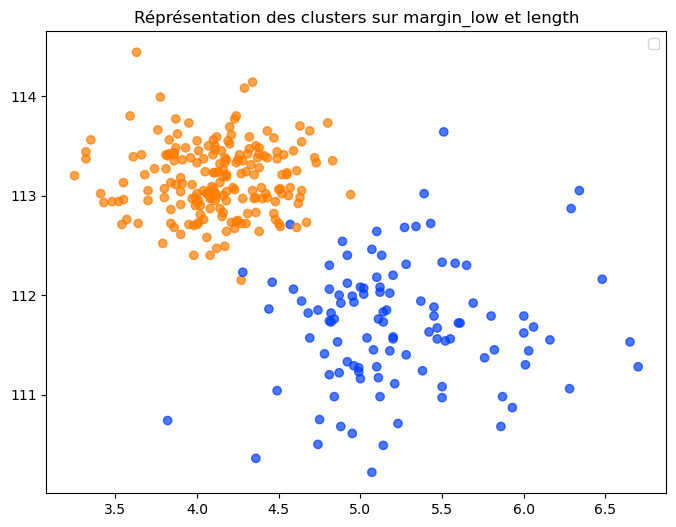

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test['margin_low'], X_test['length'], alpha=0.7, color=cluster_colors)
plt.title(f'Réprésentation des clusters sur margin_low et length')
plt.legend()
plt.show()

K-Means

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
y_kmeans = kmeans.labels_

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [58]:
predictions_Lregression

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1], d

In [59]:
predictions_kmeans = kmeans.predict(X_test_scaled)
predictions_kmeans = np.array([1 - x for x in predictions_kmeans])
predictions_kmeans

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [60]:
print("Accuracy:", accuracy_score(y_test, predictions_kmeans))

Accuracy: 0.99


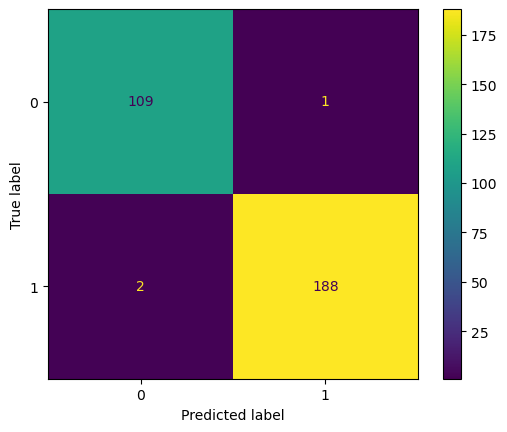

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_test, predictions_kmeans)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

Prédiction sur le plan factoriel F1 et F2 pour le k-means

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


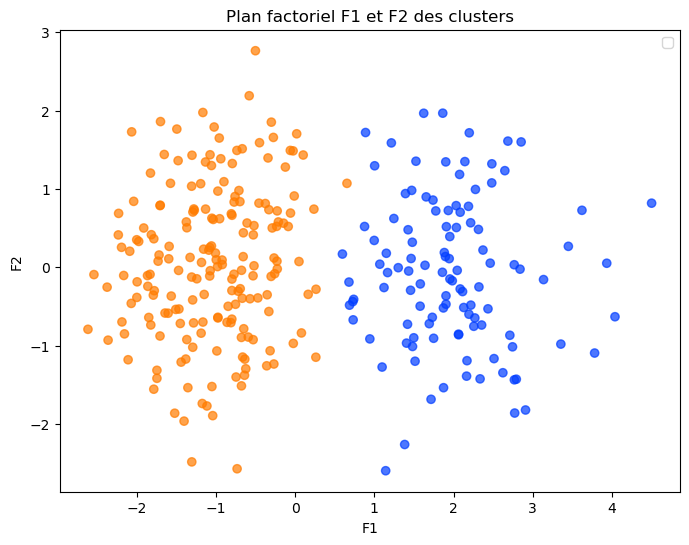

In [62]:
palette = sns.color_palette("bright", len(np.unique(predictions_kmeans)))
cluster_colors = [palette[label] for label in predictions_kmeans]
projection((0, 1), cluster_colors)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


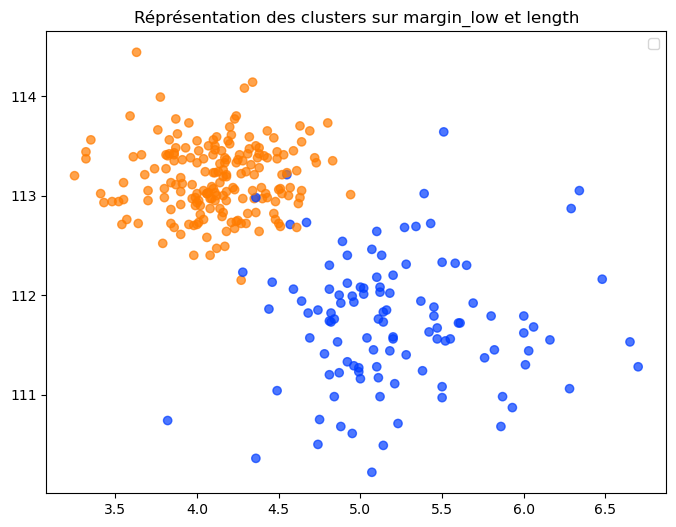

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test['margin_low'], X_test['length'], alpha=0.7, color=cluster_colors)
plt.title(f'Réprésentation des clusters sur margin_low et length')
plt.legend()
plt.show()

In [64]:
billets_prod = pd.read_csv('billets_production.csv')

In [65]:
billets_prod.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


Prédictions billets prod avec régression logistique

In [66]:
X_prod_test = billets_prod[["diagonal", "height_left", "height_right", "margin_up", "length", "margin_low"]]
X_prod_test_scaled = scaler.transform(X_prod_test)
predictions_Lregression_prod = model.predict(X_prod_test_scaled)
predictions_Lregression_prod

array([0, 0, 0, 1, 1], dtype=int64)

Prédictions billets prod avec k-means

In [67]:
predictions_kmeans_prod = kmeans.predict(X_prod_test_scaled)
predictions_kmeans_prod = [1 - x for x in predictions_kmeans_prod]
predictions_kmeans_prod

[0, 0, 0, 1, 1]